# Модуль 2
В этом модуле мы познакомимся с возможностями по работе со временем в Python, поймем основные принципы визуализации временных рядов. Узнаем, как использовать Pandas для визуализации данных, а также научимся писать собственные функции для Pandas.

Зачастую аналитики данных работают с данными, которые имеют временные метки. Например, данные о динамике ВВП в разных стран за последние 50 лет. В таком случае для построения визуализаций и моделей необходимо хорошо владеть методами работы со временем.

В свою очередь зачастую в рамках работы с датасетами в Pandas возникает необходимость многократно повторять одни и те же действия. Иногда для их выполнения не хватает стандарного набора методов, которые встроены в библиотеку. В таком случае Pandas позволяет использовать собственные кастомные функции и применять их к датасету.

Итак, давайте начнем:

# Введение

В рамках второй недели мы:
- Закрепим полученные ранее знания
- Узнаем как лучше использовать функционал Pandas для подготовки данных
- Познакомимся с основами работы с временем в Python
- Узнаем о предустановленных возможностях Pandas по созданию быстрых визуализаций

In [ ]:
# Импортируем все библиотеки, которые будем использовать в рамках работы
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import missingno as msno
import seaborn as sns
import os

%matplotlib inline
palette = plt.get_cmap('Set2')

В рамках этого модуля мы будем использовать те же датасеты, что и раньше. Импортируем их перед работой:

In [ ]:
# Импортируем данные
kiva_loans = pd.read_csv('https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_02_visualization/kiva_loans_week2', index_col=0)
mpi = pd.read_csv('https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_01_visualization/data/kiva_mpi_region_locations.csv')

# 1. Работа со временем  

Перед тем как перейти к изучению работы со временем стоит отдельно освятить, зачем это стоит изучать. Дело в том, что в случае, если мы имеем дело с временными рядами или с любыми данными, где указана дата, чтобы эффективно работать с этими данными нам необходимо понимать принципы работы с временем.

Например, мы хотим создать график динамики изменения количества займов по месяцам. С помощью работы со временем мы можем агрегировать все наши данные по месяцам и посчитать их количество.

В Python несколько встроенных библиотек для работы со временем и интервалами времени: time, datatime, calendar, timeit. Чаще всего в рамках стоящих перед нами задач используют модуль time. Рассмотрим на его примере.

Методы, связанные со временем, распределены во встроенных модулях Python 3 довольно компактно. Однако наблюдаются и некоторые пересечения. Здесь мы рассмотрим работу со следующими встроенными модулями:

In [ ]:
import time

## 1.1 Понятие epoch (эпоха)
Работа с [модулем time](https://docs.python.org/3/library/time.html) в существенной мере зависит от операционной системы. Время в библиотеке привязано к фиксированной начальной точке –  эпохе (epoch). Узнаем эту начальную точку:

In [ ]:
time.gmtime(0)

time.struct_time(tm_year=1970, tm_mon=1, tm_mday=1, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=3, tm_yday=1, tm_isdst=0)

В Windodws и Unix-системах начальной точкой отсчета (`epoch`) является 1 января 1970 г. Функция `gmtime()` вернула объект именованного кортежа `struct_time`.

С помощью функции `time()` время, прошедшее с этой начальной точки можно также вывести в **секундах** (`seconds since the epoch`):

In [ ]:
time.time()

1701539900.3941581

Так как точка `epoch` для разных операционных систем может отличаться, число секунд, возвращаемое функцией `time()` также может быть различным.

Время до точки `epoch` тоже существует, но значения секунд `seconds since the epoch` отрицательны. Если мы передадим функции `gmtime` отрицательное значение секунд, мы перенесемся в прошлое относительно момента времени `epoch`:

In [ ]:
time.gmtime(-10**8)

time.struct_time(tm_year=1966, tm_mon=10, tm_mday=31, tm_hour=14, tm_min=13, tm_sec=20, tm_wday=0, tm_yday=304, tm_isdst=0)

## 1.2. Секунды, struct_time и преобразование друг в друга

Итак, модуль `time` оперирует двумя основными типами объектов: `struct_time` и секундами с начала эпохи. Для взаимных преобразований  используются следующие функции:

- `gmtime()`: из секунд в `struct_time` для UTC
- `localtime()`: из секунд в `struct_time` для местного времени
- `calendar.timegm()` (не модуль time): из `struct_time` для UTC в секунды
- `mktime()`: из `struct_time` местного времени в секунды

UTC – стандартное обозначение [всемирного координированного времени](https://ru.wikipedia.org/wiki/%D0%92%D1%81%D0%B5%D0%BC%D0%B8%D1%80%D0%BD%D0%BE%D0%B5_%D0%BA%D0%BE%D0%BE%D1%80%D0%B4%D0%B8%D0%BD%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D0%BE%D0%B5_%D0%B2%D1%80%D0%B5%D0%BC%D1%8F) без учета [часовых поясов](https://ru.wikipedia.org/wiki/%D0%A7%D0%B0%D1%81%D0%BE%D0%B2%D0%BE%D0%B9_%D0%BF%D0%BE%D1%8F%D1%81). Начало отсчета `epoch` привязано к UTC, то есть не зависит от местного времени. Поэтому UTC удобнее использовать для общения с внешним миром.

In [ ]:
time.gmtime() # UTC-time

time.struct_time(tm_year=2023, tm_mon=12, tm_mday=2, tm_hour=17, tm_min=58, tm_sec=20, tm_wday=5, tm_yday=336, tm_isdst=0)

In [ ]:
time.localtime() # Локальное время на сервере, при использовании на своей машине, вернет ваше локальное время

time.struct_time(tm_year=2023, tm_mon=12, tm_mday=2, tm_hour=17, tm_min=58, tm_sec=20, tm_wday=5, tm_yday=336, tm_isdst=0)

В отсутствии аргумента функции `gmtime()` и `localtime()` возвращают значение для текущего времени – соответственно UTC и местное время.

Для преобразования объекта `struct_time` в секунды можно или передать сам объект, или кортеж целых чисел. Порядок элементов в кортеже:

1. Год `tm_year`
2. Месяц `tm_mon` – целое число (`1` - Январь, `12` - Декабрь)
3. День месяца `tm_day`
4. Час `tm_hour` – целое число в диапазоне от `0` до `23`
5. Минута `tm_min`
6. Секунда `tm_sec`
7. День недели `tm_wday` – целое число от `0` (Понедельник) до `6` (Воскресенье)
8. День года `tm_yday`
9. Целочисленный флаг `tm_isdst` для учета перехода на [летнее время](https://ru.wikipedia.org/wiki/%D0%9B%D0%B5%D1%82%D0%BD%D0%B5%D0%B5_%D0%B2%D1%80%D0%B5%D0%BC%D1%8F) (daylight saving time, DST): `1` – переход на летнее время учитывается, `0` – не учитывается, `-1` – неизвестно

In [ ]:
time.mktime((2015, 10, 21, 7, 28, 0, 2, 294, -1))

1445412480.0

In [ ]:
time.mktime(time.localtime())

1701539900.0

Заметим, что в отличие от представления в виде секунд, `struct_time` не хранит составляющих времени, меньших, чем секунда.

Удобство использования `struct_time` заключается в том, что это [именованный кортеж](https://docs.python.org/3/library/collections.html#collections.namedtuple). Значит, можно писать более ясный код: вместо индексов элементы объекта можно вызвать по ключам с говорящими названиями:

In [ ]:
t = time.localtime()
'Итак, на дворе {}-й год.'.format(t.tm_year)

'Итак, на дворе 2023-й год.'

## 1.3. Строки временных меток
Выше мы использовали функции, которые возвращают время в секундах, часах, годах и т.п. Однако чаще нам может понадобиться работать с датами. Для этого в библиотеках есть специальные функции для преобразования в дату.

Распространенная задача – преобразование объектов указанных типов в строки вида `timestamp`, например, `Mon Dec 2 18:30:20 2019`.
Для этого применяются функции `ctime()` и `asctime()`:
- `ctime()` – принимает время в секундах
- `asctime()` – принимает `struct_time` (по умолчанию используется местное время)

In [ ]:
time.ctime(time.time())  # преобразует время в секундах в timestamp для местного времени

'Sat Dec  2 17:58:20 2023'

In [ ]:
time.asctime()  # Аналогично time.asctime(time.localtime())

'Sat Dec  2 17:58:20 2023'

In [ ]:
time.asctime(time.gmtime())  # Время UTC

'Sat Dec  2 17:58:20 2023'

Хотя строковый вывод функций `ctime()` и `asctime()` довольно удобен, может потребоваться альтернативный формат. Для гибкого форматирования в библиотеку `time` включена функция `strftime()`. Функция принимает строку шаблона форматирования со спецификаторами и сам объект времени.

In [ ]:
time.strftime('%d.%m.%Y', time.localtime())

'02.12.2023'

In [ ]:
import locale
locale.setlocale(locale.LC_TIME)
time.strftime('Текущее время: %c', time.localtime())

'Текущее время: Sat Dec  2 17:58:20 2023'

## 1.4 Использование работы со временем для построения визуализаций

Давайте представим - мы хотим узнать динамику изменения количества кредитных денег, выданных в месяц. Для этого нам необходимо сгруппировать имеющиеся у нас данные по месяцам, а затем сложить все средства, выданные в определенный месяц.

Для решения подобных задач в pandas предустановлен тип данных `TimeStamp`, позволяющий работать с датами по тому же принципу, что и был рассмотрен выше.

In [ ]:
# Снова посмотрим наш датасет
kiva_loans.head()

,funded_amount,loan_amount,activity,sector,country,region,partner_id,funded_time,lender_count,borrower_genders
0,300.0,300.0,Fruits & Vegetables,Food,Pakistan,Lahore,247.0,2014-01-02 10:06:32+00:00,12,female
1,575.0,575.0,Rickshaw,Transportation,Pakistan,Lahore,247.0,2014-01-02 09:17:23+00:00,14,"female, female"
2,150.0,150.0,Transportation,Transportation,India,Maynaguri,334.0,2014-01-01 16:01:36+00:00,6,female
3,200.0,200.0,Embroidery,Arts,Pakistan,Lahore,247.0,2014-01-01 13:00:00+00:00,8,female
4,400.0,400.0,Milk Sales,Food,Pakistan,Abdul Hakeem,245.0,2014-01-01 19:18:51+00:00,16,female


In [ ]:
# Проверяем тип данных в столбце с датами
type(kiva_loans.funded_time[0])

str

In [ ]:
kiva_loans.funded_time[0]

'2014-01-02 10:06:32+00:00'

Преобразуем имеющийся у нас столбец с датами в формат Timestamp, предустановленный в библиотеке pandas.

In [ ]:
kiva_loans.funded_time = pd.to_datetime(kiva_loans.funded_time,
               format='%Y-%m-%d %H:%M:%S.%f')

Посмотрим на результаты преобразования:

In [ ]:
type(kiva_loans.funded_time[0])

pandas._libs.tslibs.timestamps.Timestamp

Как мы видим, теперь наш тип данных преобразован из `str` в `Timestamp`. А значит, нам доступны все методы работы с датами. Например, с помощью метода `.month` мы можем посмотреть в каком месяце произошло событие.

In [ ]:
kiva_loans.funded_time[0].month

1

Давайте используем полученные даты для решения практических задач.

Напомним, что в нашем датасете две переменные, которые нам интересны для решения этой задачи:
- funded_amount - Сумма, выплаченная Kiva агенту на местах (USD)
- loan_amount - Сумма, выплаченная полевым агентом


In [ ]:
# Создадим переменную, в которой будет указан только год и месяц взятия займа, эту переменную мы будем использовать для группировки
kiva_loans['YearMonth'] = pd.to_datetime(kiva_loans['funded_time']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))

# Сгруппируем данные по созданной выше переменной, суммируем все численные значения
# Использование метода .iloc[:-1, :] необходимо, поскольку последним элементом остается NaN - данные без указанной даты. Это портит анализ
loans_per_month = kiva_loans.groupby(by=['YearMonth'], as_index=False).sum(numeric_only=True).iloc[:-1, :]

# Преобразовываем тип данных переменной YearMonth в дату
loans_per_month.YearMonth = pd.to_datetime(loans_per_month.YearMonth, format='%Y-%m').dt.to_period('M')

# Сортируем, оставляем только интересующие нас столбцы
loans_per_month = loans_per_month.sort_values(by='YearMonth')
loans_per_month = loans_per_month.drop(['partner_id', 'lender_count'], axis=1)
loans_per_month.head(5)

,YearMonth,funded_amount,loan_amount
0,2014-01,5933175.0,5933175.0
4,2014-02,9599075.0,9599075.0
5,2014-03,13200400.0,13200400.0
6,2014-04,10331475.0,10331475.0
7,2014-05,10595075.0,10595075.0


# 2. Использование функционала Pandas для создания графиков

В библиотеке Pandas есть свой модуль pandas.plot, позволяющий быстро рисовать простые графики. Она рассчитана на создание быстрых и простых визуализаций по ходу анализа, для того, чтобы получить более полное представление о имеющихся данных.

Давайте разберем основной функционал модуля этого модуля.

# 2.1 Визуализация распределения переменной

Для того, чтобы создать простейший график, необходимо после названия датафрейма написать `.plot.bar`, где вместо `.bar` может стоять любой интересующий Вас график. Иногда начальное `.plot` можно опустить, например, при создании гистограммы:

array([[<Axes: title={'center': 'funded_amount'}>]], dtype=object)

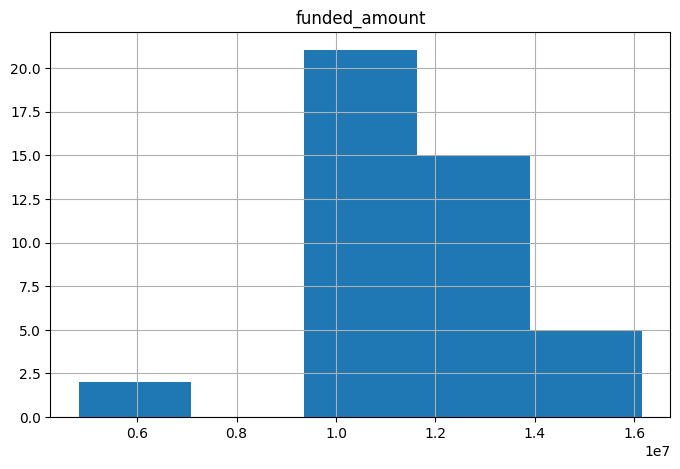

In [ ]:
loans_per_month.hist('funded_amount', bins=5, figsize=(8, 5))

# 2.2 Создание визуализаций с помощью Pandas

А для использования некоторых графиков в библиотеке pandas просто необходимо использовать модуль .plot перед указанием типа графика:

<Axes: xlabel='YearMonth'>

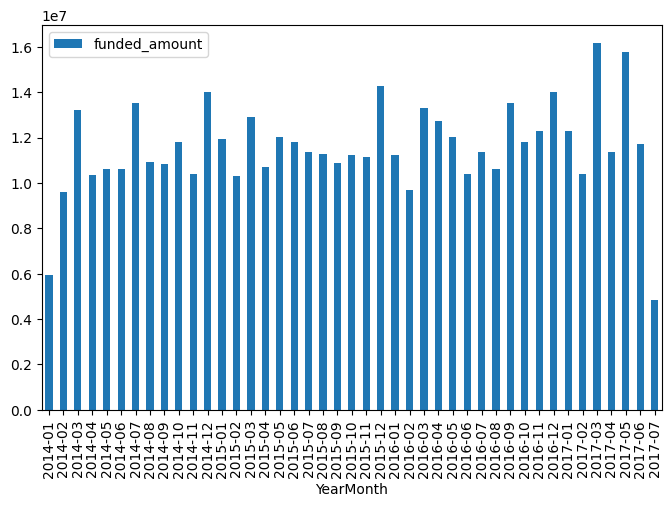

In [ ]:
loans_per_month.plot.bar(x='YearMonth', y='funded_amount', figsize=(8, 5))

Таким образом, мы построили график изменения объема выданных ссуд по месяцам. Какие зависимости вы видите на графике?


Если не уточнять какой график будет использован, то по умолчанию всегда будет строиться lineplot:

<Axes: xlabel='YearMonth'>

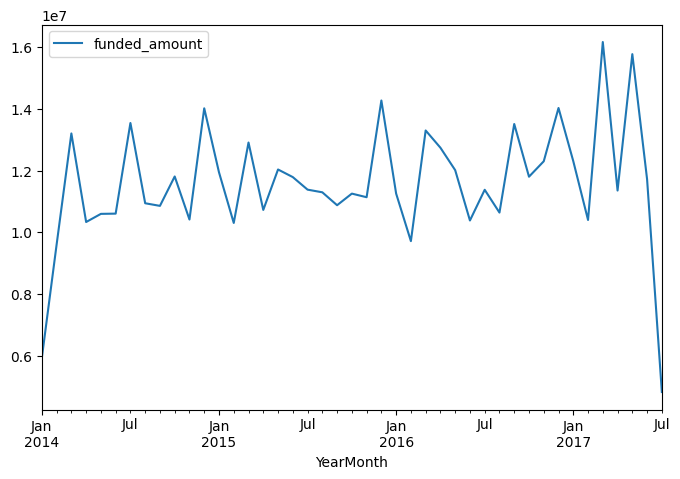

In [ ]:
loans_per_month.plot(x='YearMonth', y='funded_amount', figsize=(8, 5))

Поскольку у нас есть две численные переменные, которые напрямую связанны друг с другом, построим график созависимости двух переменных используя `.plot.scatter()`:

Если значения на таком графике расположены близко к диагонали, это значит, что существует очень высокая корреляция между двумя значениями. В зависимости от диагонали, корреляция может быть как негативной, так и позитивной. В нашем случае значения расположены настолько близко, что это свидетельствует, что корреляция очень близка к единичной.

<Axes: xlabel='funded_amount', ylabel='loan_amount'>

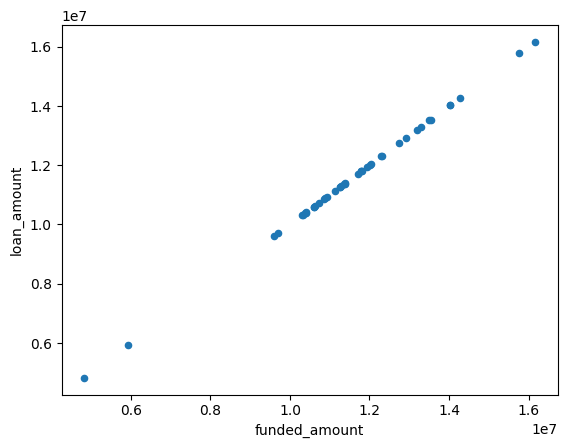

In [ ]:
loans_per_month.plot.scatter(y='loan_amount', x='funded_amount')

Все те же самые действия можно сделать воспользовавшись параметром `kind` методом в методе `.plot`.

<Axes: xlabel='funded_amount', ylabel='loan_amount'>

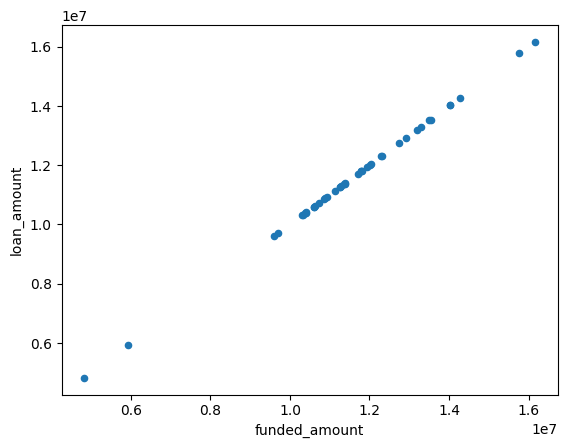

In [ ]:
loans_per_month.plot(kind='scatter', y='loan_amount', x='funded_amount')

# 3. Написание собственных функций для работы с pandas

Все проделанные выше действия не являются уникальными для нашего конкретного датасета. Многие из этих операций в рамках большого проекта нужно будет повторять большое количество раз - например, преобразование данных из типа строки (`str`) в дату (`TimeStamp`). Такая ситуация, к примеру, может возникнуть когда вы работаете с несколькими датасетами в рамках одного проекта.

Чаще при импорте данных возникает проблема с типом импортированных данных. Зачастую числовые значения интерпретируются при импорте как `str`. Для решения этой проблемы будет удобно написать функцию, которую можно будем многократно использовать.

Для того, чтобы многократно использовать один и тот же функционал, можно написать функцию, которую затем можно будет использовать неограниченное количество раз. Pandas предлагает удобные инструменты работы с такими функциями с помощью метода `.apply`.

In [ ]:
kiva_loans_pandas = pd.read_csv('https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_02_visualization/kiva_loans_week2', index_col=0)

## 3.1 Метод apply()

Метод `.apply()` позволяет применять заданную функцию к каждому элементу `pandas.Series` или `pandas.DataFrame`.

Давайте автоматизируем то, что делали ранее, и напишем функцию, которая будет менять тип данных столбца на дату.

In [ ]:
def str_to_date(series):
  return series.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S.%f'))

print("Тип данных funded_time до применения функции:", type(kiva_loans_pandas.funded_time[0]))
kiva_loans_pandas.funded_time = str_to_date(kiva_loans_pandas.funded_time)
print("Тип данных funded_time после применения функции:", type(kiva_loans_pandas.funded_time[0]))

Тип данных funded_time до применения функции: <class 'str'>
Тип данных funded_time после применения функции: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
kiva_loans_pandas.head()

,funded_amount,loan_amount,activity,sector,country,region,partner_id,funded_time,lender_count,borrower_genders
0,300.0,300.0,Fruits & Vegetables,Food,Pakistan,Lahore,247.0,2014-01-02 10:06:32+00:00,12,female
1,575.0,575.0,Rickshaw,Transportation,Pakistan,Lahore,247.0,2014-01-02 09:17:23+00:00,14,"female, female"
2,150.0,150.0,Transportation,Transportation,India,Maynaguri,334.0,2014-01-01 16:01:36+00:00,6,female
3,200.0,200.0,Embroidery,Arts,Pakistan,Lahore,247.0,2014-01-01 13:00:00+00:00,8,female
4,400.0,400.0,Milk Sales,Food,Pakistan,Abdul Hakeem,245.0,2014-01-01 19:18:51+00:00,16,female


# 3.2 Создание визуализаций с помощью собственных функций

С помощью того же функционала можно создавать и более сложные функции. В 1 неделе мы писали код, который заменял значения на "группа", в случае если ссуда предоставлялась нескольким людям. Давайте сделаем то же самое с помощью нового функционала:

In [ ]:
def gender_get(series):
  return series.apply(lambda x: 'female' if x=='female' else 'male' if x=='male' else 'group')

gender_distribution = gender_get(kiva_loans_pandas['borrower_genders']).value_counts()

<Axes: >

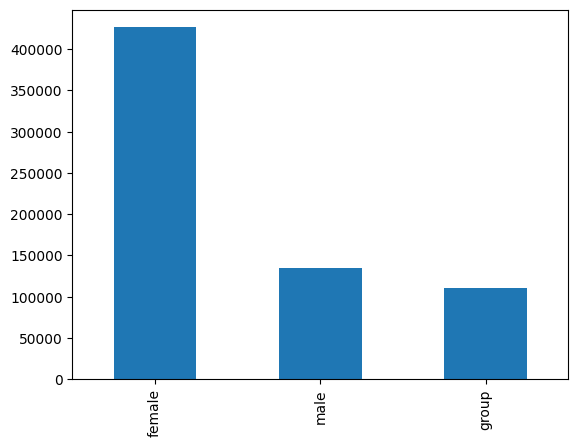

In [ ]:
gender_distribution.plot.bar()

# 3.3 Работа с выбросами после применения собственной функции

Давайте узнаем, насколько отличается размер `funded_amount` от `loan_amount`. Поскольку выше анализ scatter plot не дал результатов, создадим новую переменную, путем вычитания одного столбца из другого:

In [ ]:
def subtracted_amount(df, first_col, second_col, result):
  df[result] = df[first_col] - df[second_col]
  return df

kiva_loans_pandas = subtracted_amount(kiva_loans_pandas, 'loan_amount', 'funded_amount', 'unfunded_amount')
kiva_loans_pandas.head(5)

,funded_amount,loan_amount,activity,sector,country,region,partner_id,funded_time,lender_count,borrower_genders,unfunded_amount
0,300.0,300.0,Fruits & Vegetables,Food,Pakistan,Lahore,247.0,2014-01-02 10:06:32+00:00,12,female,0.0
1,575.0,575.0,Rickshaw,Transportation,Pakistan,Lahore,247.0,2014-01-02 09:17:23+00:00,14,"female, female",0.0
2,150.0,150.0,Transportation,Transportation,India,Maynaguri,334.0,2014-01-01 16:01:36+00:00,6,female,0.0
3,200.0,200.0,Embroidery,Arts,Pakistan,Lahore,247.0,2014-01-01 13:00:00+00:00,8,female,0.0
4,400.0,400.0,Milk Sales,Food,Pakistan,Abdul Hakeem,245.0,2014-01-01 19:18:51+00:00,16,female,0.0


В рамках модуля plot библиотеки Pandas, можно создать график плотности распределения, задав параметр `kind='kde'`:

<Axes: ylabel='Density'>

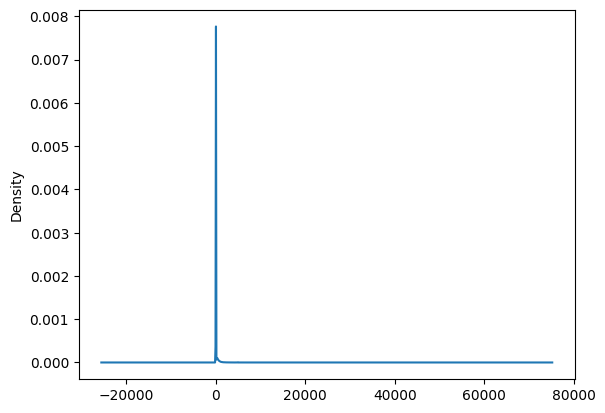

In [ ]:
kiva_loans_pandas.unfunded_amount.plot(kind='kde')

Судя по этому графику, все значения равны нулю. Однако, мы видим, что при этом нам показан достаточно большой промежуток: от ~-25k до ~75k. Возможно, там находятся выбросы?

Построим гистограмму для той же переменной:

<Axes: >

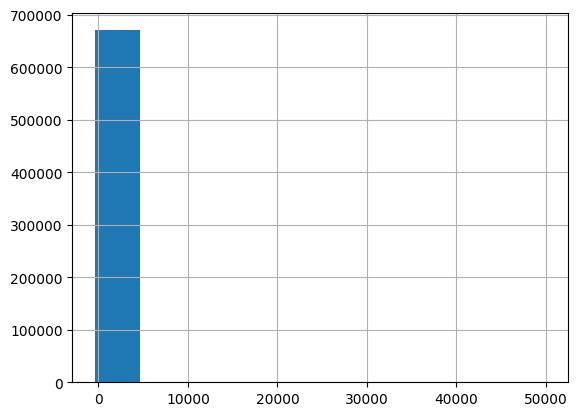

In [ ]:
kiva_loans_pandas.unfunded_amount.hist()

Та же ситуация - столбец один, а интервал показан огромный: до 50k. Следовательно, надо избавиться от выбросов, которые портят визуализацию. Попробуем ограничить пятью тысячами:

<Axes: >

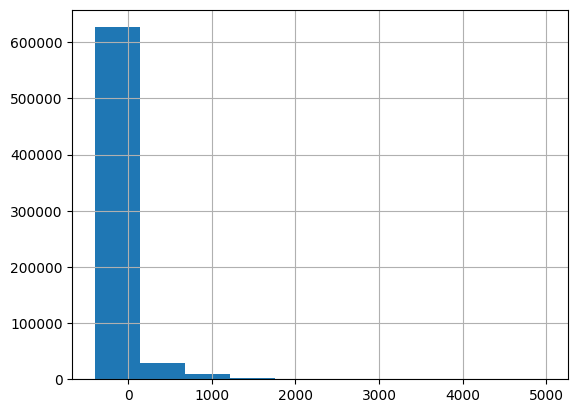

In [ ]:
kiva_loans_pandas[kiva_loans_pandas['unfunded_amount'] < 5000]['unfunded_amount'].hist()

Уже лучше, теперь мы видим больше столбцов. Попробуем еще больше ограничить визуализацию:

<Axes: >

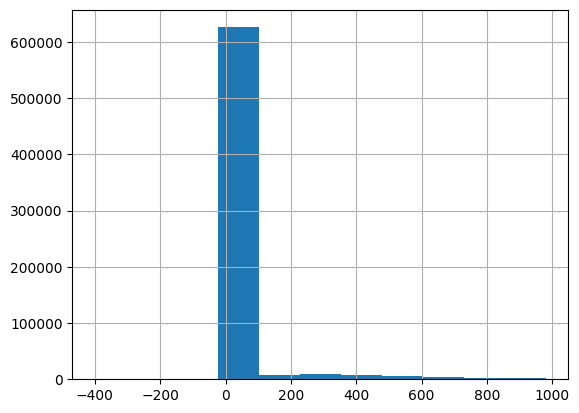

In [ ]:
kiva_loans_pandas[kiva_loans_pandas['unfunded_amount'] < 1000]['unfunded_amount'].hist(bins=11)

Еще лучше! Но теперь видно, что самый высокий столбик немного заходит в отрицательную плоскость, так есть какие-то значения или это особенность разметки гистограммы? Проверим на данных:

In [ ]:
kiva_loans_pandas[kiva_loans_pandas['unfunded_amount'] <= 0]['unfunded_amount'].value_counts()

 0.0      622875
-25.0          1
-400.0         1
Name: unfunded_amount, dtype: int64

Мы видим, что всего 2 значения заходят в отрицательную плоскость - то есть это точно выбросы. При этом почти 623 тысячи значений равны нулю, что сильно портит визуализацию остальных результатов. Давайте построим гистограмму распределения значений в интервале `(0, 5000]`

<Axes: >

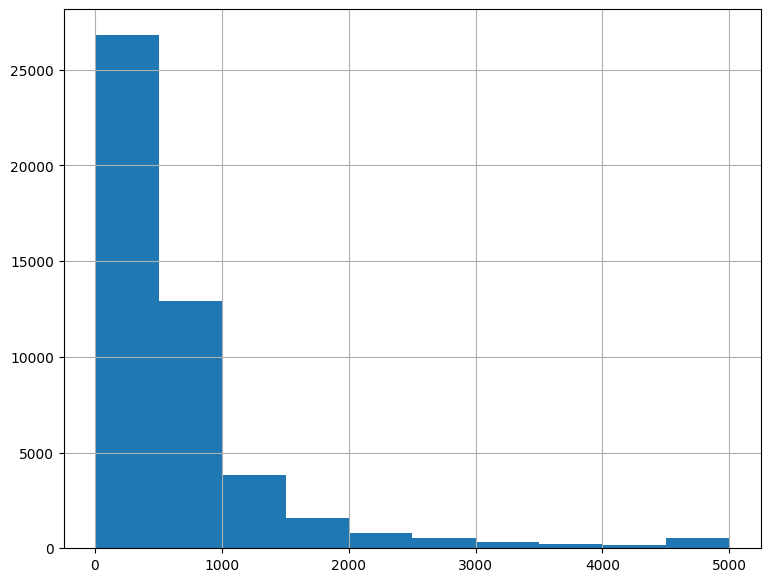

In [ ]:
kiva_loans_pandas[(kiva_loans_pandas['unfunded_amount'] > 0) & (kiva_loans_pandas['unfunded_amount'] <= 5000)]['unfunded_amount'].hist(figsize=(9, 7))

Таким образом, мы смогли обнаружить интервалы, в которых находятся выбросы и понять, как лучше визуализировать имеющиеся значения, благодаря построению серии быстрых графиков.

То же самое можно проделать на большом количестве других задач. Например, давайте посмотрим распределение количества субсидируемых регионов в каждой стране:

In [ ]:
funded_amount_per_region = kiva_loans_pandas.groupby(['country', 'region'], as_index=False)['funded_amount'].count()

<Axes: ylabel='Density'>

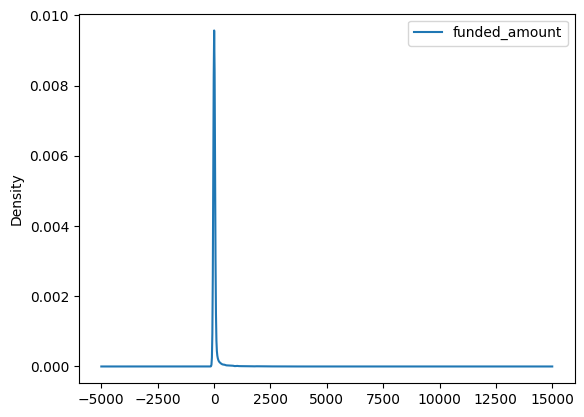

In [ ]:
funded_amount_per_region.plot(kind='kde')

<Axes: ylabel='Density'>

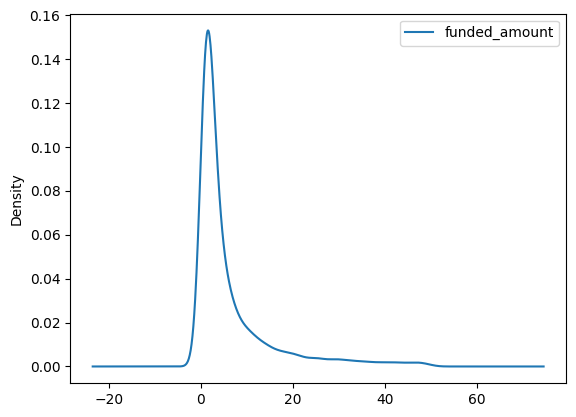

In [ ]:
funded_amount_per_region[funded_amount_per_region['funded_amount'] <= 50].plot(kind='kde')

In [ ]:
funded_amount_per_region.groupby('country')['region'].count().describe()

count      82.000000
mean      155.475610
std       429.059731
min         1.000000
25%         8.000000
50%        32.000000
75%       116.000000
max      3638.000000
Name: region, dtype: float64

In [ ]:
regions_in_country = funded_amount_per_region.groupby('country', as_index=False)['region'].count()

<Axes: ylabel='Density'>

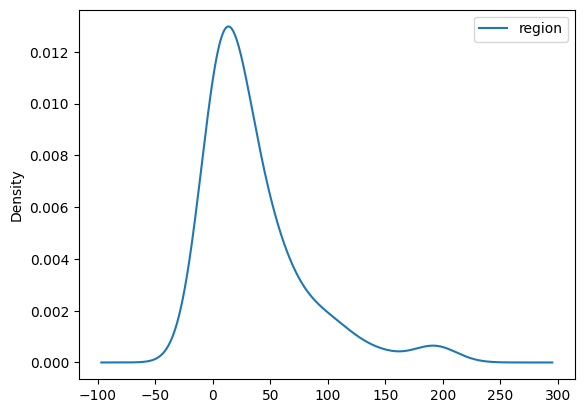

In [ ]:
regions_in_country[regions_in_country['region']<200].plot(kind='kde')

# 3.4 Метод .pipe() - использование собственного функционала Pandas

В рамках модуля Pandas существует метод `.pipe()`, позволяющий использовать собственные функции для работы с Pandas. Таким образом, мы можем использовать всё, что было написано ранее, более эффективным путем.

Например, выше мы уже написали функцию gender_get, которая принимает на вход столбец с гендерным составом группы, и применяет к каждому наблюдению алгоритм, возвращающий значения "male", "female" или "group". То же самое мы можем использовать с помощью Pandas метода `.pipe()`, но в более удобном и практичном виде. Давайте попробуем его применить:

In [ ]:
# Снова скопируем наш датафрейм в отдельную переменную
kiva_loans_pipe = pd.read_csv('https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_02_visualization/kiva_loans_week2', index_col=0)

In [ ]:
kiva_loans_pipe.head(5)

,funded_amount,loan_amount,activity,sector,country,region,partner_id,funded_time,lender_count,borrower_genders
0,300.0,300.0,Fruits & Vegetables,Food,Pakistan,Lahore,247.0,2014-01-02 10:06:32+00:00,12,female
1,575.0,575.0,Rickshaw,Transportation,Pakistan,Lahore,247.0,2014-01-02 09:17:23+00:00,14,"female, female"
2,150.0,150.0,Transportation,Transportation,India,Maynaguri,334.0,2014-01-01 16:01:36+00:00,6,female
3,200.0,200.0,Embroidery,Arts,Pakistan,Lahore,247.0,2014-01-01 13:00:00+00:00,8,female
4,400.0,400.0,Milk Sales,Food,Pakistan,Abdul Hakeem,245.0,2014-01-01 19:18:51+00:00,16,female


Применим метод `.pipe()` с ранее написанной функцией `gender_get` к нашему "чистому" датафрейму.

In [ ]:
kiva_loans_pipe['borrower_genders'] =  kiva_loans_pipe['borrower_genders'].pipe(gender_get)

In [ ]:
kiva_loans_pipe.head(5)

,funded_amount,loan_amount,activity,sector,country,region,partner_id,funded_time,lender_count,borrower_genders
0,300.0,300.0,Fruits & Vegetables,Food,Pakistan,Lahore,247.0,2014-01-02 10:06:32+00:00,12,female
1,575.0,575.0,Rickshaw,Transportation,Pakistan,Lahore,247.0,2014-01-02 09:17:23+00:00,14,group
2,150.0,150.0,Transportation,Transportation,India,Maynaguri,334.0,2014-01-01 16:01:36+00:00,6,female
3,200.0,200.0,Embroidery,Arts,Pakistan,Lahore,247.0,2014-01-01 13:00:00+00:00,8,female
4,400.0,400.0,Milk Sales,Food,Pakistan,Abdul Hakeem,245.0,2014-01-01 19:18:51+00:00,16,female


Как мы видим, результат не отличим от результатов, полученных ранее. Так в чем же преимущество использования данного метода?

Метод `.pipe()` позволяет в более понятной и краткой манере применять несколько функций к датафрейму:

In [ ]:
# Создадим функции, которые переведут количество денег в тысячи и добавят в конце значек доллара

def number_to_thousands(series):
  series /= 1000
  return series

def add_dollar_sign(series):
  series = series.apply(lambda x: str(x) + '$')
  return series

kiva_loans_pipe['loan_amount'].pipe(number_to_thousands).pipe(add_dollar_sign)

0           0.3$
1         0.575$
2          0.15$
3           0.2$
4           0.4$
           ...  
671200    0.025$
671201    0.025$
671202    0.025$
671203    0.025$
671204    0.025$
Name: loan_amount, Length: 671205, dtype: object

Сравните читаемость:

In [ ]:
kiva_loans_pipe['loan_amount'].pipe(number_to_thousands).pipe(add_dollar_sign)

0           0.0003$
1         0.000575$
2          0.00015$
3           0.0002$
4           0.0004$
            ...    
671200     2.5e-05$
671201     2.5e-05$
671202     2.5e-05$
671203     2.5e-05$
671204     2.5e-05$
Name: loan_amount, Length: 671205, dtype: object

In [ ]:
add_dollar_sign(number_to_thousands(kiva_loans_pipe['loan_amount']))

0                          3e-07$
1                       5.75e-07$
2                        1.5e-07$
3         2.0000000000000002e-07$
4         4.0000000000000003e-07$
                   ...           
671200    2.5000000000000002e-08$
671201    2.5000000000000002e-08$
671202    2.5000000000000002e-08$
671203    2.5000000000000002e-08$
671204    2.5000000000000002e-08$
Name: loan_amount, Length: 671205, dtype: object

В чем отличия методов `.apply()` и `.pipe`?

**Метод .apply():**
1. **Применение к строкам или столбцам:** .apply() в основном используется для применения функции вдоль оси DataFrame, либо вдоль строк (axis=0), либо вдоль столбцов (axis=1).
2. **Гибкость функций:** Этот метод универсальный и может принимать функции, работающие с одномерными массивами, такими как объекты Series.
3. **Операции вдоль столбцов или строк:** .apply() может выполнять операции вдоль столбцов или строк, что делает его мощным инструментом для настраиваемых преобразований.
4. **Доступ к нескольким столбцам:** Функция, переданная .apply(), может обращаться к нескольким столбцам одновременно и возвращать Series или скалярное значение.

**Метод .pipe():**
1. **Цепочка методов:** .pipe() предназначен для цепочки методов, что позволяет вам более свободно объединять несколько операций.
2. **Передача DataFrame в функцию:** Он принимает функцию в качестве аргумента, и эта функция может принимать и возвращать DataFrame. Это делает его удобным для более сложных манипуляций данными.
3. **Ясность и читаемость кода:** .pipe() может повысить ясность и читаемость вашего кода, когда у вас есть последовательность операций с DataFrame.
4. **Пользовательские функции:** Можно определить пользовательские функции и применять их с использованием .pipe(), что полезно для создания многоразовых конвейеров обработки данных.

Самое полезное для нас в рамках этого курса - метод `.pipe` позволяет создавать и использовать шаблоны для наших графиков, которые можно будет использовать в нашем анализе.

## Заключение и выводы

В этом модуле мы познакомились с основными принципами работы с временем в Python, научились визуализировать графики и строить временные ряды с помощью Pandas, создали собственные функции для обработки данных в Pandas, повторили концепты, пройденные в предыдущем модуле.

1. Работа со временем
   - Для работы со временем есть специальные библиотеки. Самая популярная из них - `time`. Однако использование этой библиотеки в отрыве от всего остального не очень удобно.
   - В рамках библиотеки Pandas уже встроены все необходимые методы и собственный тип данных для работы со временем `TimeStamp`.
   - После импорта данных со столбцом дат, необходимо проверить тип данных этого столбца. В случае, если даты импортировались некорректно, стоит использовать функцию `pd.to_datetime()`.
2. Использование Pandas для визуализации
   - В библиотеке Pandas есть ряд методов для простейшей визуализации данных. Например, чтобы создать быструю визуализацию в ходе EDA, необязательно обращаться к другим библиотекам.
   - Самые популярные типы визуализации можно создать напрямую указав название графика (`df.hist()` или `df.plot()`), к другим же можно обратиться лишь через подмодуль `.plot` (`df.plot.bar()` или `df.plot.scatter()`).
   - С помощью встроенных методов Pandas можно строить визуализацию временных рядов, обозначив в качестве параметра `x` столбец с временем. Например, `loans_per_month.plot.bar(x='YearMonth', y='funded_amount', figsize=(8, 5))`.
3. Написание собственных функций для работы с Pandas
   - Написав функцию, ее можно применить к столбцам или строкам датафрейма с помощью метода `.apply()`.
   - Создание собственных функций может помочь при создании визуализаций в Pandas.
   - Для того, чтобы создать собственные функции для применения к нескольким столбцам или ко всему датасету используется метод `.pipe()`. Этот метод специально создан для того чтобы максимально эффективно применять последовательно несколько функций к одному датасету.